# Modelo Hierarchical Clustering Dataset Mall Customer
## Wilder Araque Caicedo
### Análisis de Datos
### UNAD

In [38]:
#Importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

In [4]:
# Cargue del dataset Mall_Customers.csv desde ruta del notebook
MallCustomer = pd.read_csv('Mall_Customers.csv')
# Cargue de la información del dataset
MallCustomer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Estadísticas descriptivas
MallCustomer.info()
MallCustomer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Identificar valores nulos
print("Valores nulos:\n", MallCustomer.isnull().sum())

Valores nulos:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

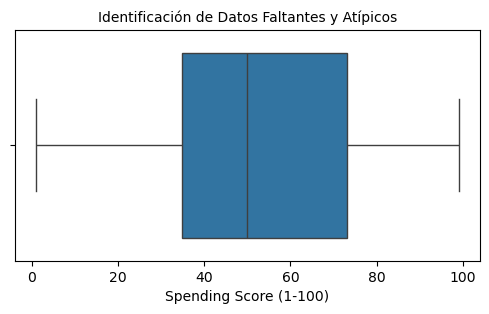

In [18]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=MallCustomer['Spending Score (1-100)']) #Tasa de gasto
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [20]:
# Eliminar columnas innecesarias
MallCustomer = MallCustomer.drop(['CustomerID'], axis=1)

# Convertir variables categóricas de género a numéricas
MallCustomer['Gender'] = MallCustomer['Gender'].map({'Male': 0, 'Female': 1})

# Manejar valores faltantes
MallCustomer.fillna(MallCustomer.mean(), inplace=True)

# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_MallCustomer = scaler.fit_transform(MallCustomer)

In [24]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((MallCustomer['Spending Score (1-100)']<nivel_minimo)|(MallCustomer['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


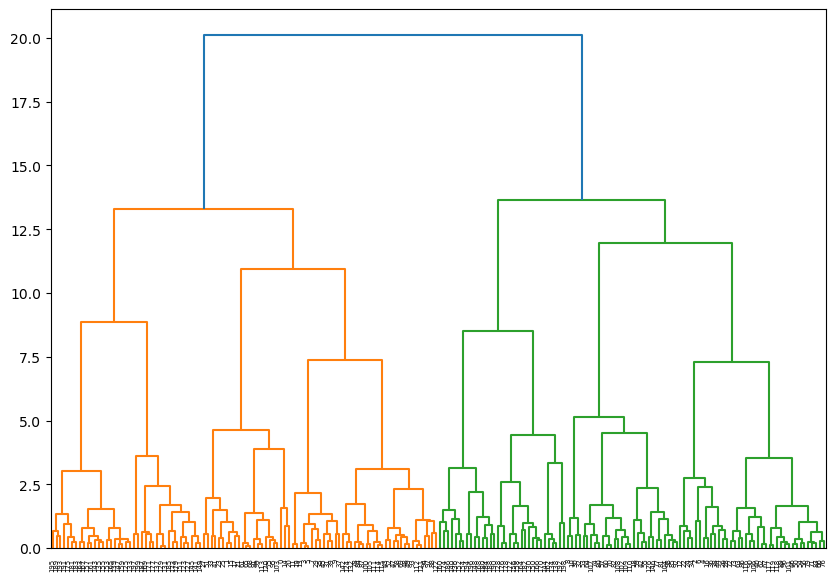

In [30]:
# Aplicar el método de enlace
Z = linkage(scaled_MallCustomer, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

In [36]:
# Entrenar el modelo y obtener las etiquetas de los clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(scaled_MallCustomer)

# Coeficiente de Silhouette
silhouette_avg = silhouette_score(scaled_MallCustomer, labels)
print(f"Silhouette Coefficient: {silhouette_avg}")

# Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(scaled_MallCustomer, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Coeficiente cofenético
X_dist = pdist(scaled_MallCustomer)
cophenet_corr, _ = cophenet(Z, X_dist)
print(f"Coeficiente de Correlación Cofenética: {cophenet_corr}")

Silhouette Coefficient: 0.24834537795671963
Calinski-Harabasz Index: 57.671893896362825
Coeficiente de Correlación Cofenética: 0.5956238167278256


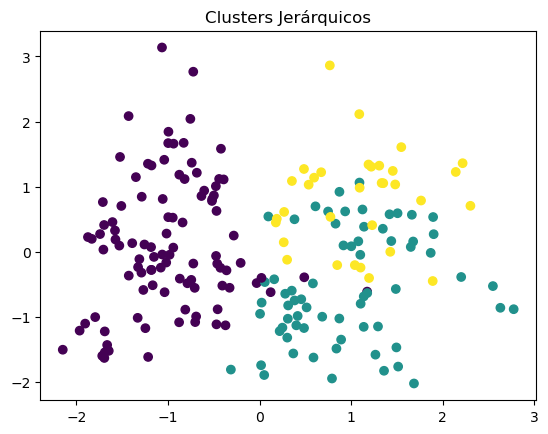

In [40]:
# Visualizar los clusters en 2D o 3D

# Reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_MallCustomer)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis')
plt.title("Clusters Jerárquicos")
plt.show()